In [15]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [16]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\Gene_data\cleaned_dataset_Gene.csv")

In [17]:
df

,Gene_One,Gene_Two,Cancer_Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2133,5.0,6.5,1
2134,3.4,6.6,0
2135,2.7,6.5,0
2136,3.3,5.6,0


# X and y

In [18]:
X = df.drop(columns = ['Cancer_Present'])
y = df['Cancer_Present']

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

# Modelling and evaluation

**Decision Tree classifier- with default hyperparameter**

In [20]:
# modeling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state = True)
dt_default.fit(X_train, y_train)

# Prediction
pred_train = dt_default.predict(X_train)
pred_test = dt_default.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(pred_train, y_train))
print("Test Accuracy : ", accuracy_score(pred_test, y_test))

from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(dt_default, X, y, cv=5).mean())


Train Accuracy :  0.9690058479532164
Test Accuracy :  0.8434579439252337
cross_val_score :  0.8596741009871085


# visualize Tree

In [21]:
X_train.columns.tolist()

['Gene_One', 'Gene_Two']

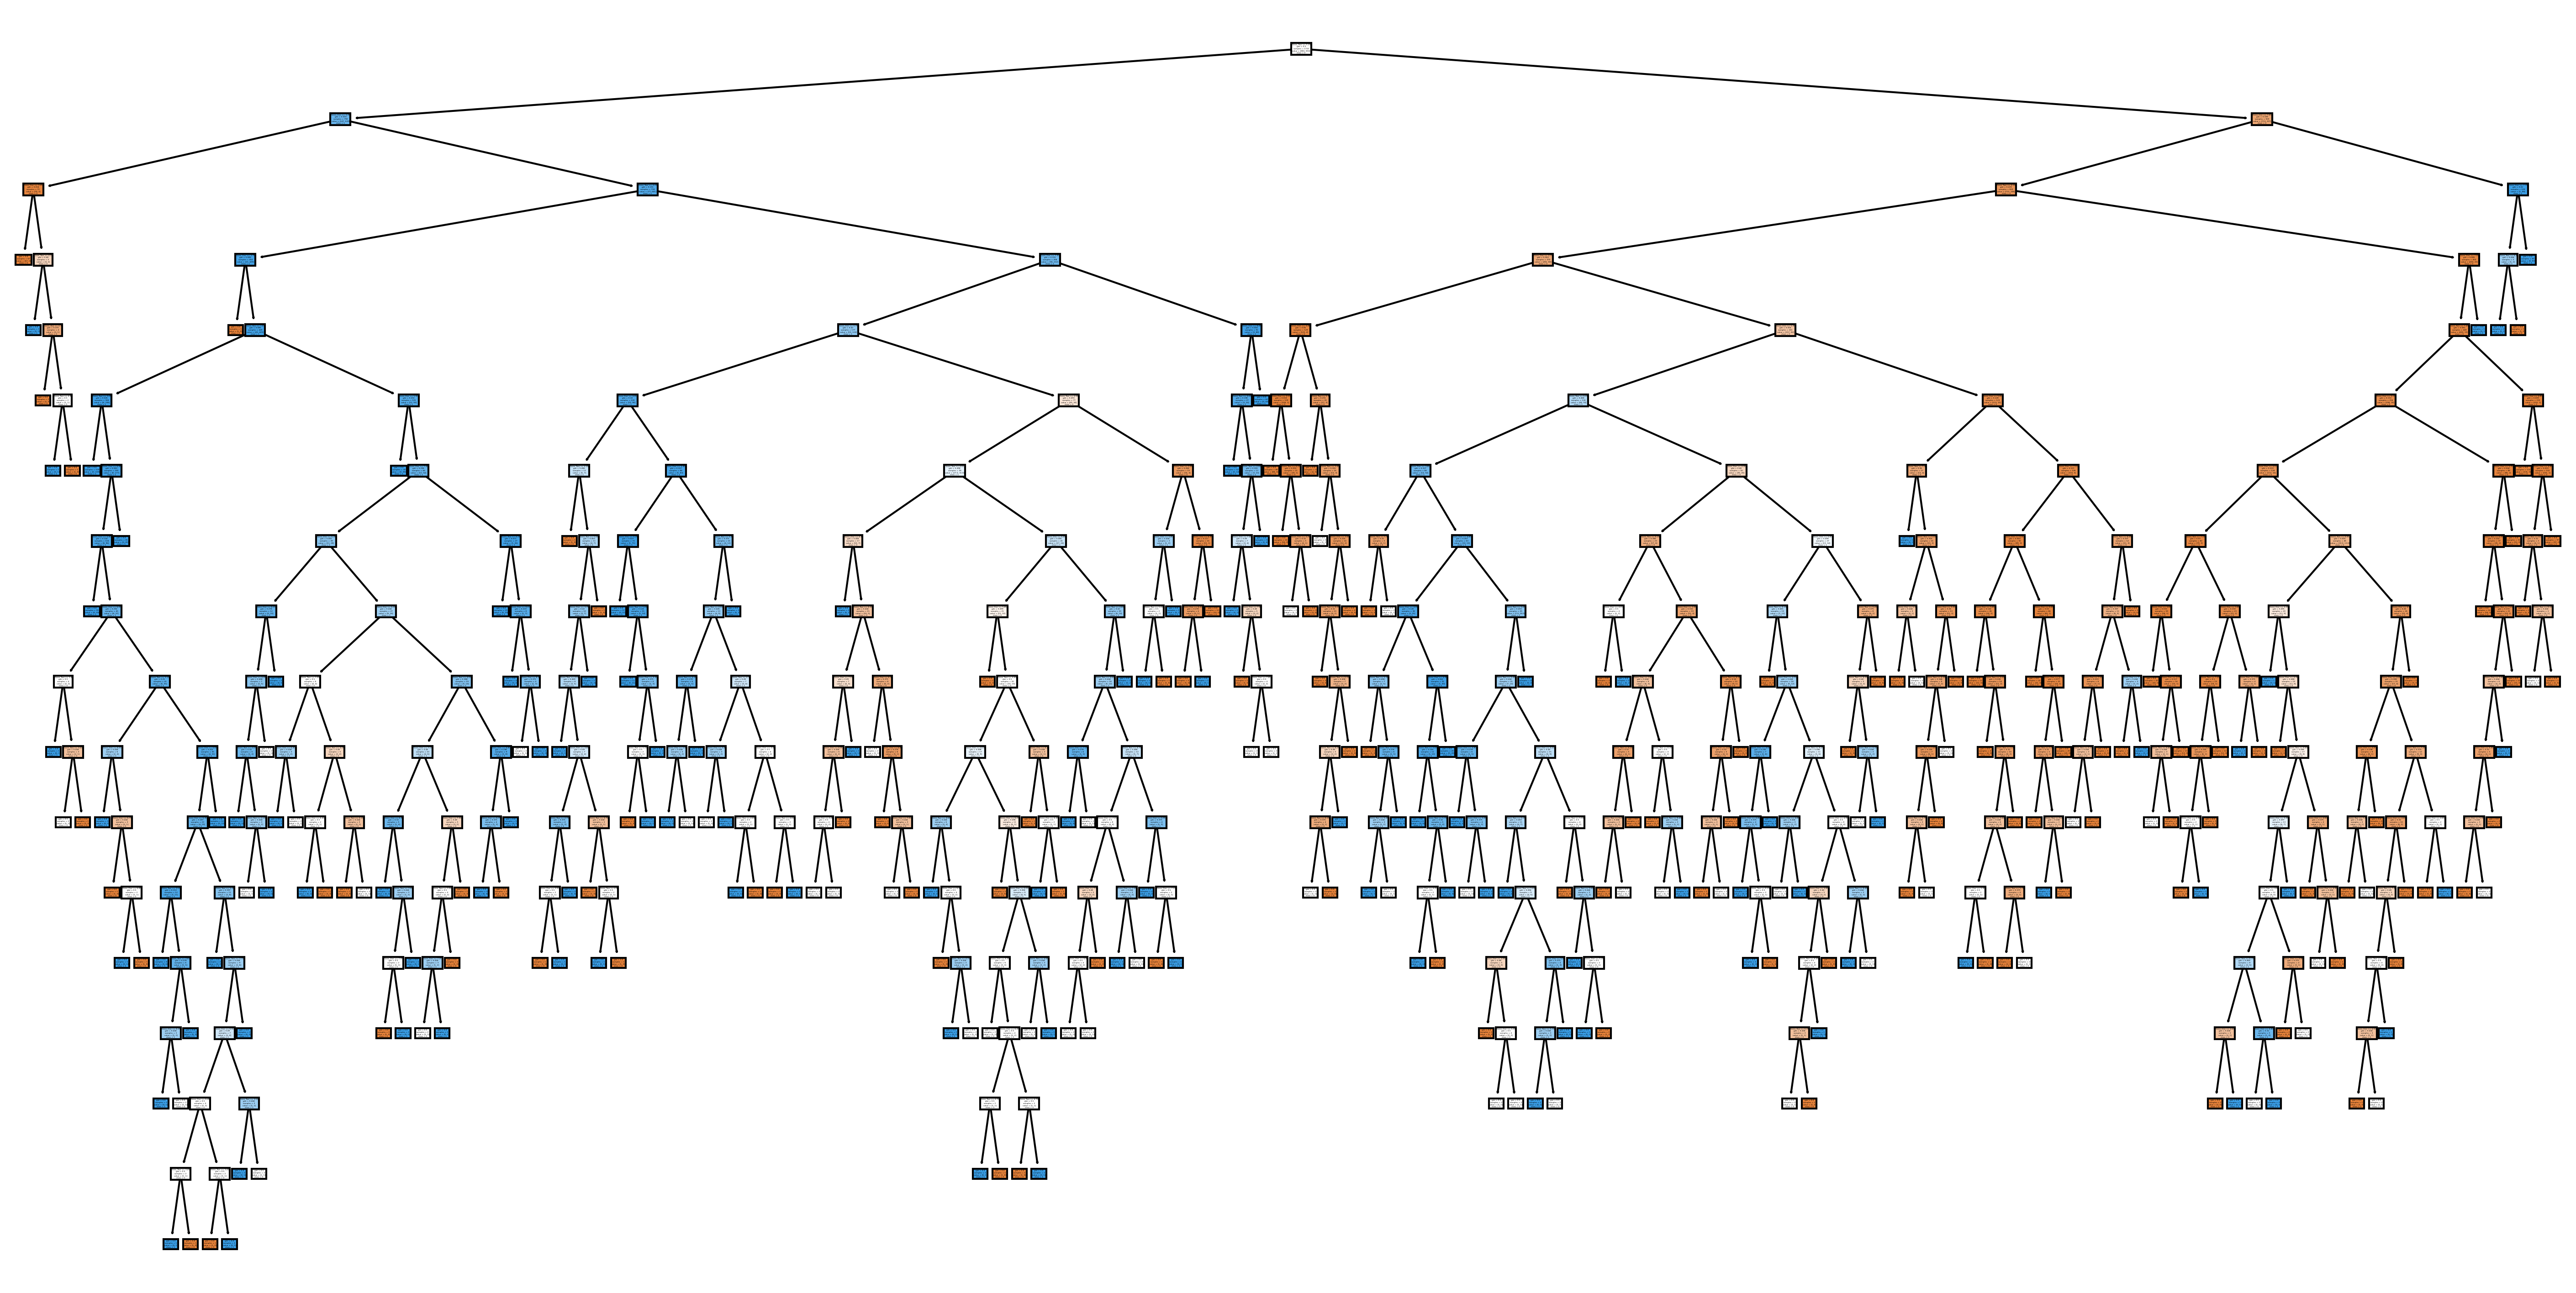

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12), dpi = 300)

plot_tree(dt_default,
         filled = True,
         feature_names = X_train.columns.tolist(),
         class_names = ['0','1']
         )
plt.show()

In [23]:
print("Depth of the tree:", dt_default.get_depth())


Depth of the tree: 17


# HyperParameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state = True)

# Parameters (which you want to tune and identify the best)
param_grid = {"criterion" : ['gini', 'entropy'], 
             'max_depth' : [1,2,3,4,5]}


grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv= 5)

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [25]:
grid.best_estimator_.feature_importances_

array([0.49334855, 0.50665145])

In [26]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index = X.columns,
                    columns = ['Feature Importance'])
feats_imp = feats[feats['Feature Importance'] > 0]
important_features_list = feats_imp.index.to_list()
important_features_list

['Gene_One', 'Gene_Two']

# Final Decision Tree model
**with best hyper parameters and imp_features**

In [27]:
# input with important features
X_imp = X[important_features_list]

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.2, random_state = True)

# Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = True)
final_dt_model.fit(X_train, y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluation
print("Train Accuracy : ", accuracy_score(ypred_train, y_train))
print("Test Accuracy : ", accuracy_score(ypred_test, y_test))
print("Cross_val_score : ", cross_val_score(final_dt_model, X_imp, y, cv=5).mean())

Train Accuracy :  0.8900584795321638
Test Accuracy :  0.8925233644859814
Cross_val_score :  0.888202849701241


In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred_test)

array([[191,  25],
       [ 21, 191]], dtype=int64)